In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 13.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## **COMPLETE MODEL BUILDING**

In [ ]:
df = web.DataReader('CGPOWER.NS', data_source='yahoo', start='2012-01-01', end='2019-12-17')

In [ ]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,44.484386,42.856064,43.756840,43.098579,1723914.0,39.500015
2012-01-03,43.999355,42.786774,43.479675,43.566288,2481913.0,39.928673
2012-01-04,45.714291,43.427708,43.652901,44.917450,4251670.0,41.167023
2012-01-05,46.389870,45.194611,45.454449,45.454449,3134281.0,41.659180
2012-01-06,45.696968,43.445030,45.489098,43.774158,5168505.0,40.119190
...,...,...,...,...,...,...
2019-12-12,11.650000,10.650000,11.000000,11.550000,1118968.0,11.550000
2019-12-13,12.100000,11.550000,11.900000,12.100000,2562743.0,12.100000
2019-12-16,12.100000,11.600000,12.100000,11.950000,634157.0,11.950000


In [ ]:
df.shape

(1958, 6)

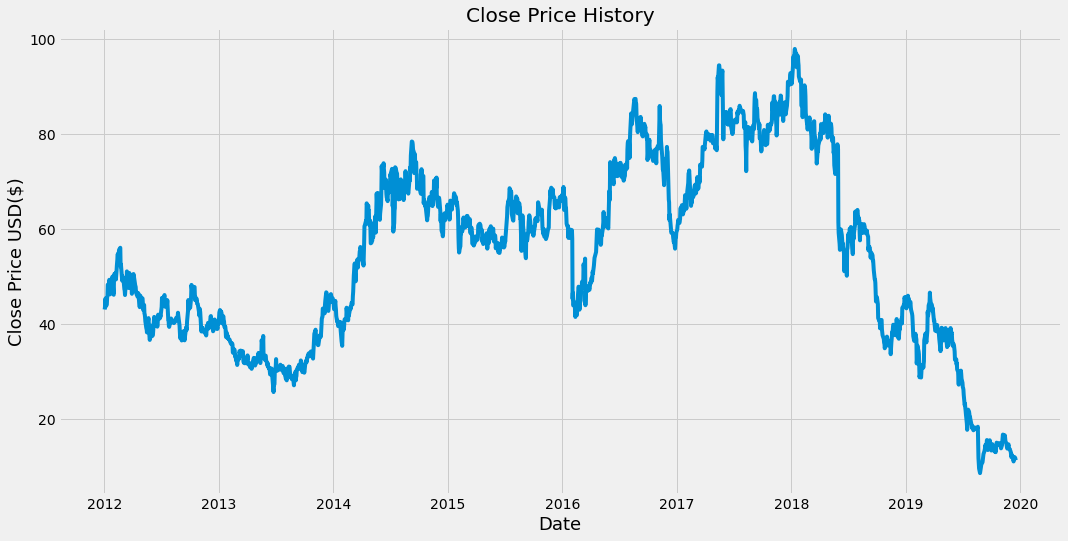

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show()

In [ ]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1567

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
scaled_data

array([[0.38563429],
       [0.39087766],
       [0.40602522],
       ...,
       [0.03643498],
       [0.03307175],
       [0.03026906]])

In [ ]:
train_data = scaled_data[0:training_data_len, :]
x_train, y_train = [], []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.38563429, 0.39087766, 0.40602522, 0.41204538, 0.39320805,
       0.39728627, 0.41379322, 0.41806559, 0.44408828, 0.44486508,
       0.43787392, 0.45574026, 0.43185375, 0.42136697, 0.42292056,
       0.42563935, 0.43243631, 0.45535186, 0.46331402, 0.42136697,
       0.42039598, 0.46098363, 0.46933422, 0.45923584, 0.47185881,
       0.45651705, 0.465256  , 0.47613118, 0.48894835, 0.51671884,
       0.4974931 , 0.50390167, 0.51827243, 0.52623462, 0.53128379,
       0.48700636, 0.49224973, 0.48273395, 0.45379827, 0.46409081,
       0.45612866, 0.45515766, 0.45748805, 0.43340735, 0.43049436,
       0.41981338, 0.4415637 , 0.43787392, 0.47554859, 0.4732182 ,
       0.46972262, 0.44292309, 0.43651453, 0.44952585, 0.47166461,
       0.43748552, 0.45962424, 0.4417579 , 0.43632033, 0.43670873])]
[0.42272636429710286]

[array([0.38563429, 0.39087766, 0.40602522, 0.41204538, 0.39320805,
       0.39728627, 0.41379322, 0.41806559, 0.44408828, 0.44486508,
       0.43787392, 0.45574026, 0.43

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1507, 60, 1)

In [ ]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1507/1507 [==============================] - 32s 19ms/step - loss: 0.0024


In [ ]:
test_data = scaled_data[training_data_len-60:,:]

x_test, y_test = [], dataset[training_data_len:,:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

In [ ]:
rmse = np.sqrt(np.mean(prediction- y_test)**2)

In [ ]:
rmse

2.290408022263471

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Prediction'] = prediction

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


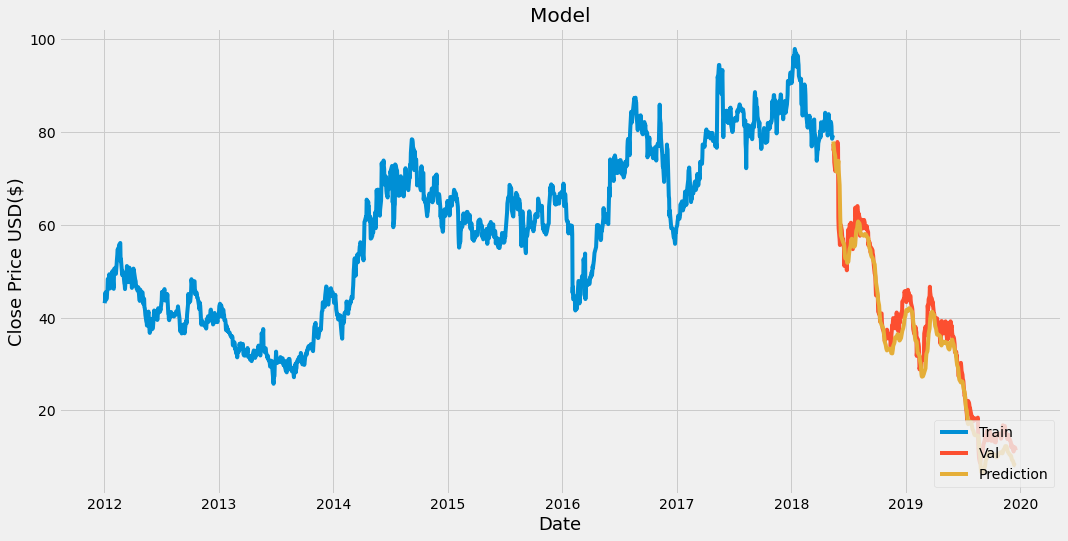

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Train','Val','Prediction'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Prediction
Date,,
2018-05-15,77.449997,77.968643
2018-05-16,76.000000,77.327538
2018-05-17,76.500000,76.492409
2018-05-18,73.449997,75.807999
2018-05-21,71.599998,74.791199
...,...,...
2019-12-12,11.550000,8.451118
2019-12-13,12.100000,8.242756
2019-12-16,11.950000,8.158482


In [ ]:
tcs_quote = web.DataReader('TCS.NS', data_source='yahoo', start='2012-01-01', end='2019-12-17')

new_df = tcs_quote.filter(['Close'])

last_60_day = new_df[-60:].values

last_60_day_scaled = scaler.transform(last_60_day)

X_test = []

X_test.append(last_60_day_scaled)

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

In [ ]:
tcs_quote2 = web.DataReader('TCS.NS', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(tcs_quote2['Close'])

## **FUNCTION BUILDING**

In [ ]:
def PLOT(data):
  plt.figure(figsize=(16,8))
  plt.title("Close Price History")
  plt.plot(data['Close'])
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD($)', fontsize=18)
  plt.show()

def STOCK_PRED(stock,start,end):
  df = web.DataReader(stock, data_source='yahoo', start=start, end=end)

  PLOT(df)

  data = df.filter(['Close'])
  dataset = data.values
  training_data_len = math.ceil(len(dataset) * .8)

  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_data = scaler.fit_transform(dataset)

  train_data = scaled_data[0:training_data_len, :]
  x_train, y_train = [], []

  for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

  x_train, y_train = np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

  model = Sequential()

  model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
  model.add(LSTM(50, return_sequences=False))
  model.add(Dense(25))
  model.add(Dense(1))

  model.compile(optimizer='adam', loss='mean_squared_error')

  model.fit(x_train, y_train, batch_size=1, epochs=1)

  test_data = scaled_data[training_data_len-60:,:]

  x_test, y_test = [], dataset[training_data_len:,:]

  for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  prediction = model.predict(x_test)
  prediction = scaler.inverse_transform(prediction)

  rmse = np.sqrt(np.mean(prediction- y_test)**2)

  print("RMSE is : ", rmse)

  train = data.iloc[:training_data_len,:]
  valid = data.iloc[training_data_len:,:]
  valid['Prediction'] = prediction

  plt.figure(figsize=(16,8))
  plt.title("Model")
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD($)', fontsize=18)
  plt.plot(train['Close'])
  plt.plot(valid[['Close','Prediction']])
  plt.legend(['Train','Val','Prediction'], loc='lower right')
  plt.show()

  return model,scaler

def PRICE_PRED(model,scaler,stock,start,end,date_pred):
  quote = web.DataReader(stock, data_source='yahoo', start=start, end=end)
  new_df = quote.filter(['Close'])
  last_60_day = new_df[-60:].values
  last_60_day_scaled = scaler.transform(last_60_day)
  X_test = []
  X_test.append(last_60_day_scaled)
  X_test = np.array(X_test)
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
  pred_price = model.predict(X_test)
  pred_price = scaler.inverse_transform(pred_price)
  print("THE PREDICTED PRICE IS : ",pred_price)

  quote2 = web.DataReader(stock, data_source='yahoo', start=date_pred, end=date_pred)
  print("THE ACTUAL PRICE IS : ")
  print(quote2['Close'])

## **TESTING FUNCTIONS**

In [ ]:
stock = 'AAPL'
start = '2012-01-01'
end = '2020-08-13'
date_pred = '2020-08-14'

model,scaler = STOCK_PRED(stock,start,end)
PRICE_PRED(model,scaler,stock,start,end,date_pred)

In [ ]:
stock = 'TCS.NS'
start = '2012-01-01'
end = '2020-10-05'
date_pred = '2020-10-06'

model,scaler = STOCK_PRED(stock,start,end)
PRICE_PRED(model,scaler,stock,start,end,date_pred)

In [ ]:
stock = 'LAURUSLABS.NS'
start = '2012-01-01'
end = '2020-10-05'
date_pred = '2020-10-06'

model,scaler = STOCK_PRED(stock,start,end)
PRICE_PRED(model,scaler,stock,start,end,date_pred)

In [ ]:
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()

print("now =", now)

# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)

In [ ]:
date = now.strftime("%Y-%m-%d")
time = now.strftime("%H:%M:%S")

In [ ]:
date

In [ ]:
x = datetime.now(tz)
x

In [ ]:
datetime.tzinfo()